## LABEL ENCODING VS ONE HOT ENCODING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

#### Reading the dataset

In [2]:
df = pd.read_csv('Taxi_out_processed.csv')
df = df.drop('Unnamed: 0',1)
df1 = pd.read_csv('Taxi_out_processed.csv')
df1 = df1.drop('Unnamed: 0',1)

In [3]:
df.head()

,DAY_OF_WEEK,CARRIER_CODE,DEST,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE,ACTUAL_DEPATURE,SCHEDULED_ARRIVAL,Temperature,...,Wind Gust,Pressure,Condition,FLT_SCH_DEPATURE,FLT_SCH_ARRIVAL,TAXI_OUT,SPEED,Region,TOTAL_SCHEDULED,FLIGHT_TRAFFIC
0,5,DL,SFO,EARLY,6.516667,4161.75324,420,414,631,47,...,29,30.0,Fair / Windy,17,21,16,638.632211,West,38,Medium
1,5,DL,SLC,EARLY,5.350000,3202.58660,419,414,620,47,...,29,30.0,Fair / Windy,17,21,25,598.614318,West,38,Medium
2,5,DL,BOS,EARLY,1.366667,300.94658,420,415,502,47,...,29,30.0,Fair / Windy,17,21,15,220.204815,North East,38,Medium
3,5,B6,SAV,EARLY,2.383333,1155.50612,419,417,562,47,...,29,30.0,Fair / Windy,17,21,14,484.827743,South,38,Medium
4,5,B6,ATL,ONTIME,2.566667,1223.09840,418,418,572,47,...,29,30.0,Fair / Windy,17,21,16,476.531844,South,38,Medium


#### NUMERICAL AND CATEGORICAL COLUMNS

In [4]:
cat = df.select_dtypes(include = 'object')
cat.columns

Index(['CARRIER_CODE', 'DEST', 'DEP_DELAY', 'Wind', 'Condition', 'Region',
       'FLIGHT_TRAFFIC'],
      dtype='object')

In [5]:
cat.head(2)

,CARRIER_CODE,DEST,DEP_DELAY,Wind,Condition,Region,FLIGHT_TRAFFIC
0,DL,SFO,EARLY,W,Fair / Windy,West,Medium
1,DL,SLC,EARLY,W,Fair / Windy,West,Medium


In [6]:
num = df.select_dtypes(exclude = 'object')
num.columns

Index(['DAY_OF_WEEK', 'SCHEDULED_DURATION', 'DISTANCE', 'SCHEDULED_DEPARTURE',
       'ACTUAL_DEPATURE', 'SCHEDULED_ARRIVAL', 'Temperature', 'Dew Point',
       'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'FLT_SCH_DEPATURE',
       'FLT_SCH_ARRIVAL', 'TAXI_OUT', 'SPEED', 'TOTAL_SCHEDULED'],
      dtype='object')

In [7]:
num.head(2)

,DAY_OF_WEEK,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE,ACTUAL_DEPATURE,SCHEDULED_ARRIVAL,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,FLT_SCH_DEPATURE,FLT_SCH_ARRIVAL,TAXI_OUT,SPEED,TOTAL_SCHEDULED
0,5,6.516667,4161.75324,420,414,631,47,33,59,24,29,30.0,17,21,16,638.632211,38
1,5,5.350000,3202.58660,419,414,620,47,33,59,24,29,30.0,17,21,25,598.614318,38


### Label Encoding

In [8]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])

In [9]:
df.head()

,DAY_OF_WEEK,CARRIER_CODE,DEST,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE,ACTUAL_DEPATURE,SCHEDULED_ARRIVAL,Temperature,...,Wind Gust,Pressure,Condition,FLT_SCH_DEPATURE,FLT_SCH_ARRIVAL,TAXI_OUT,SPEED,Region,TOTAL_SCHEDULED,FLIGHT_TRAFFIC
0,5,4,50,1,6.516667,4161.75324,420,414,631,47,...,29,30.0,3,17,21,16,638.632211,3,38,1
1,5,4,52,1,5.350000,3202.58660,419,414,620,47,...,29,30.0,3,17,21,25,598.614318,3,38,1
2,5,4,4,1,1.366667,300.94658,420,415,502,47,...,29,30.0,3,17,21,15,220.204815,1,38,1
3,5,3,48,1,2.383333,1155.50612,419,417,562,47,...,29,30.0,3,17,21,14,484.827743,2,38,1
4,5,3,1,2,2.566667,1223.09840,418,418,572,47,...,29,30.0,3,17,21,16,476.531844,2,38,1


#### Splitting of data

In [10]:
inp=df.drop('TAXI_OUT',axis=1)
out=df['TAXI_OUT']

In [11]:
xtr,xt,ytr,yt=train_test_split(inp,out,test_size=0.3,random_state=100)
xtr.shape,xt.shape,ytr.shape,yt.shape

((8869, 23), (3802, 23), (8869,), (3802,))

Linear Regression

In [12]:
err_lab=[]

In [13]:
lr0 = LinearRegression()
lr0.fit(xtr, ytr)
x_lr0=lr0.predict(xt)
temp= math.sqrt(mean_squared_error(yt,x_lr0))
err_lab.append(temp)

Ridge Regression

In [14]:
lr1 = Ridge(alpha=0.5, normalize = True)
lr1.fit(xtr, ytr)
x_lr1=lr1.predict(xt)
temp= math.sqrt(mean_squared_error(yt,x_lr1))
err_lab.append(temp)

Lasso Regression

In [15]:
lr2 = Lasso(alpha=0.1)
lr2.fit(xtr, ytr)
x_lr2=lr2.predict(xt)
temp= math.sqrt(mean_squared_error(yt,x_lr2))
err_lab.append(temp)

KNeighbors Classifier

In [16]:
knn= KNeighborsClassifier(n_neighbors=10)
knn_pred= knn.fit(xtr,ytr.values.ravel()).predict(xt)
temp= math.sqrt(mean_squared_error(yt,knn_pred))
err_lab.append(temp)

Support Vector Regression

In [17]:
reg= SVR(kernel='rbf')
reg.fit(xtr,ytr.values.ravel())
svr_pred= reg.predict(xt)
temp= math.sqrt(mean_squared_error(yt,svr_pred))
err_lab.append(temp)

Gaussian Naive Bayes

In [18]:
gnb= GaussianNB()
gnb_pred= gnb.fit(xtr,ytr.values.ravel()).predict(xt)
temp= math.sqrt(mean_squared_error(yt,gnb_pred))
err_lab.append(temp)

Random Forest Classifier

In [19]:
rfc= RandomForestClassifier()
rfc_pred= rfc.fit(xtr,ytr.values.ravel()).predict(xt)
temp= math.sqrt(mean_squared_error(yt,rfc_pred))
err_lab.append(temp)

Light GBM

In [20]:
lgb_train= lgb.Dataset(xtr, label = ytr)
lgb_eval= lgb.Dataset(xtr,ytr, reference= lgb_train)
params = {'boosting_type': 'gbdt', 'num_leaves': 60, 'learning_rate': 0.2}
gbm_pred = lgb.train(params, lgb_train, 100).predict(xt)
temp= math.sqrt(mean_squared_error(yt,gbm_pred))
err_lab.append(temp)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1765
[LightGBM] [Info] Number of data points in the train set: 8869, number of used features: 23
[LightGBM] [Info] Start training from score 19.903935


### One Hot Encoding

In [21]:
err_ohe =[]

In [22]:
ohe=OneHotEncoder()
for i in df.columns:
    if df1[i].dtypes == 'object':
        df1[i] =  pd.get_dummies(df1[i])

In [23]:
df1.head()

,DAY_OF_WEEK,CARRIER_CODE,DEST,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE,ACTUAL_DEPATURE,SCHEDULED_ARRIVAL,Temperature,...,Wind Gust,Pressure,Condition,FLT_SCH_DEPATURE,FLT_SCH_ARRIVAL,TAXI_OUT,SPEED,Region,TOTAL_SCHEDULED,FLIGHT_TRAFFIC
0,5,0,0,0,6.516667,4161.75324,420,414,631,47,...,29,30.0,0,17,21,16,638.632211,0,38,0
1,5,0,0,0,5.350000,3202.58660,419,414,620,47,...,29,30.0,0,17,21,25,598.614318,0,38,0
2,5,0,0,0,1.366667,300.94658,420,415,502,47,...,29,30.0,0,17,21,15,220.204815,0,38,0
3,5,0,0,0,2.383333,1155.50612,419,417,562,47,...,29,30.0,0,17,21,14,484.827743,0,38,0
4,5,0,0,0,2.566667,1223.09840,418,418,572,47,...,29,30.0,0,17,21,16,476.531844,0,38,0


In [24]:
inp=df1.drop('TAXI_OUT',axis=1)
out=df1['TAXI_OUT']

In [25]:
xtr,xt,ytr,yt=train_test_split(inp,out,test_size=0.3,random_state=100)
xtr.shape,xt.shape,ytr.shape,yt.shape

((8869, 23), (3802, 23), (8869,), (3802,))

Linear Regression

In [26]:
lr0 = LinearRegression()
lr0.fit(xtr, ytr)
x_lr0=lr0.predict(xt)
temp= math.sqrt(mean_squared_error(yt,x_lr0))
err_ohe.append(temp)

Ridge Regression

In [27]:
lr1 = Ridge(alpha=0.5, normalize = True)
lr1.fit(xtr, ytr)
x_lr1=lr1.predict(xt)
temp= math.sqrt(mean_squared_error(yt,x_lr1))
err_ohe.append(temp)

Lasso Regression

In [28]:
lr2 = Lasso(alpha=0.1)
lr2.fit(xtr, ytr)
x_lr2=lr2.predict(xt)
temp= math.sqrt(mean_squared_error(yt,x_lr2))
err_ohe.append(temp)

KNeighbors Classifier

In [29]:
knn= KNeighborsClassifier(n_neighbors=10)
knn_pred= knn.fit(xtr,ytr.values.ravel()).predict(xt)
temp= math.sqrt(mean_squared_error(yt,knn_pred))
err_ohe.append(temp)

Support Vector Regression

In [30]:
reg= SVR(kernel='rbf')
reg.fit(xtr,ytr.values.ravel())
svr_pred= reg.predict(xt)
temp= math.sqrt(mean_squared_error(yt,svr_pred))
err_ohe.append(temp)

Gaussian Naive Bayes

In [31]:
gnb= GaussianNB()
gnb_pred= gnb.fit(xtr,ytr.values.ravel()).predict(xt)
temp= math.sqrt(mean_squared_error(yt,gnb_pred))
err_ohe.append(temp)

Random Forest Classifier

In [32]:
rfc= RandomForestClassifier()
rfc_pred= rfc.fit(xtr,ytr.values.ravel()).predict(xt)
temp= math.sqrt(mean_squared_error(yt,rfc_pred))
err_ohe.append(temp)

Light GBM

In [33]:
lgb_train= lgb.Dataset(xtr, label = ytr)
lgb_eval= lgb.Dataset(xtr,ytr, reference= lgb_train)
params = {'boosting_type': 'gbdt', 'num_leaves': 60, 'learning_rate': 0.2}
gbm_pred = lgb.train(params, lgb_train, 100).predict(xt)
temp= math.sqrt(mean_squared_error(yt,gbm_pred))
err_ohe.append(temp)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1684
[LightGBM] [Info] Number of data points in the train set: 8869, number of used features: 23
[LightGBM] [Info] Start training from score 19.903935


## Compairing models on the basis of RMSE

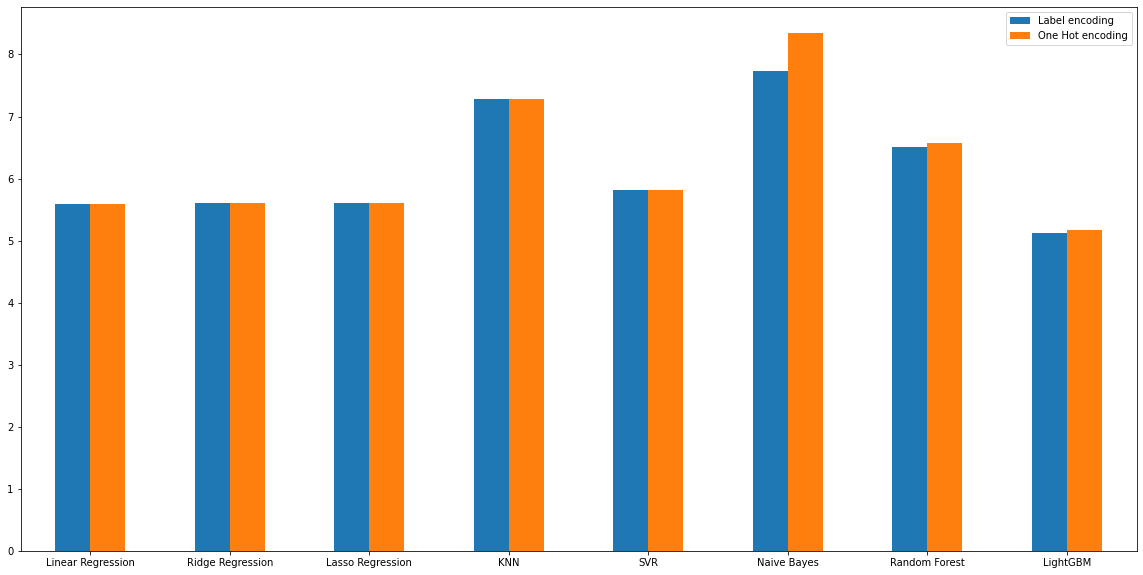

In [34]:
labels=['Linear Regression','Ridge Regression','Lasso Regression','KNN','SVR','Naive Bayes','Random Forest','LightGBM']
df = pd.DataFrame({'Label encoding':err_lab,'One Hot encoding':err_ohe}, index=labels)
ax = df.plot.bar(rot=0,figsize=(20,10))

### Conclusion

###### Label encoding is better in predicting taxi_out time in almost all algorithms.

###### One hot encoding produces exceptinally big RMSE in Naive Bayes algorithm.

###### On the basis of RMSE we can say that LightGBM model is best model in both Label encoded as well as One Hot Encoded data.